<a href="https://colab.research.google.com/github/sanjivyash/SHALA2020/blob/master/Assignment4_ML_YashSanjeev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [87]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
df.shape

(20640, 9)

In [0]:
df = df[df.Target < 5]

In [90]:
X = df.MedInc
y = df.Target
y.shape
X.shape

(19648,)

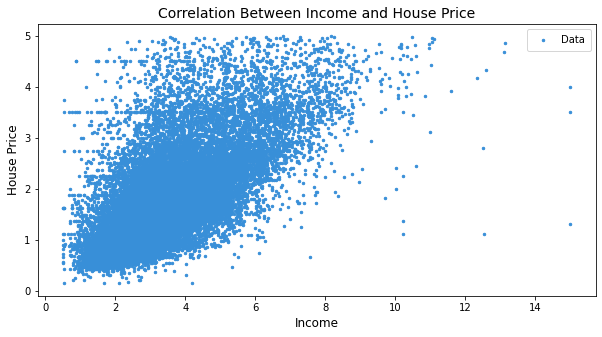

In [91]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X, y, lr = 0.01, epochs=200, batch_size = 100):
    ################################################
    ####write your code here######################## 
    ################################################# 
    m = 0
    b = 0
    mse = []
    for epoch in range(epochs):
        seed = np.random.randint(0, y.shape[0], batch_size)
        X_batch = X[seed]
        y_batch = y[seed]
        y_pred = b + m * X_batch
        error = y_pred - y_batch 
        mse.append(np.sum(error * error) / batch_size)
        dm = np.sum(2 * error * X_batch / batch_size)
        db = np.sum(2 * error / batch_size)
        m -= lr * dm
        b -= lr * db

    return m, b, mse

In [0]:
X = np.asarray(X)
y = np.asarray(y)
m, b,  mse = SGD(X, y, lr=4e-4, epochs=300, batch_size=500)

In [94]:
mse[-1]

0.6581795390521736

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

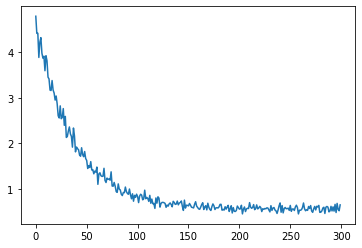

In [95]:
plt.plot(mse)

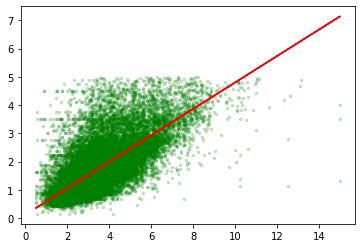

In [96]:
y_pred = m*X + b
plt.plot(X, y_pred, c = 'r')
plt.scatter(X, y, c = 'g', s = 6, alpha = 0.2)
################################################
###########write your code#####################
###############################################

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



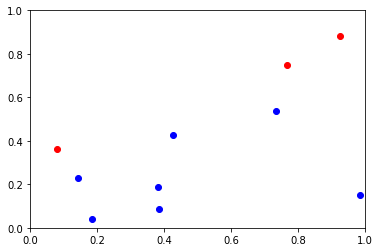

In [99]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, Y, epochs = 1000, l_rate = 1e-2, reg = 0.0):
    ###################################
    ### Write your code here###########
    ###################################
    y = Y.reshape(-1,1)
    N,F = x.shape
    X = np.hstack((np.ones((N,1)), x))
    W = np.random.randn(F+1, 1)
    loss_rec = []

    for i in range(epochs):
        dW = np.zeros(W.shape)
        L = np.maximum(y * (y - X.dot(W)) - 1, 0)
        loss_rec.append(L.sum() + reg * np.sum(W * W))
        mask = y.copy()
        mask[L == 0] = 0
        dW = X.transpose().dot(mask)
        W += l_rate * dW - 2 * reg * W

    return W, loss_rec



---


**Run SVM Classifier**


---



In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w, loss_rec = svm_function(X, Y, 100, 1e-2)

[[-0.04493357]
 [-0.25623942]
 [ 0.33665553]]
0.0


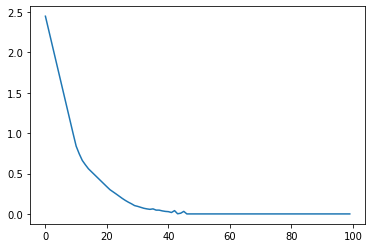

In [102]:
print(w)
print(loss_rec[-1])
plt.plot(loss_rec)
plt.show()

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



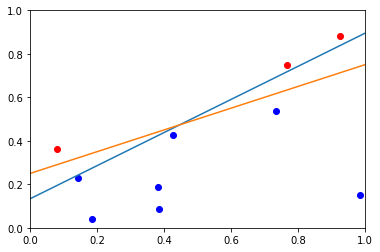

In [103]:
###################################
### Write your code here###########
X = np.linspace(0,1,1000)
Y_pred = -(w[0] + w[1] * X) / w[2]
Y_real = 0.5 * X + 0.25
plt.plot(X, Y_pred)
plt.plot(X, Y_real)

for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(0,1)
    plt.ylim(0,1)

plt.show()
###################################